# Import Library

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv('C://Users//Abhishek v. sakhare//Downloads//Spam-Text-Detection-main//spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2957,spam,U have a secret admirer. REVEAL who thinks U R...,NaN,NaN,NaN
708,spam,To review and KEEP the fantastic Nokia N-Gage ...,NaN,NaN,NaN
5075,ham,"Well, i'm glad you didn't find it totally disa...",NaN,NaN,NaN
4241,spam,Show ur colours! Euro 2004 2-4-1 Offer! Get an...,NaN,NaN,NaN
5467,spam,Get your garden ready for summer with a FREE s...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Project flow

**Data Cleaning**

**EDA**

**Text Preprocessing**

**Model Building**

**Evaluation**

**Improvement**

**Website**

**Deployment**

# 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Drop last 3 columns**

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [7]:
df.sample(5)

,v1,v2
1427,ham,THING R GOOD THANX GOT EXAMS IN MARCH IVE DONE...
1657,ham,S:-)if we have one good partnership going we w...
4515,spam,Congrats! 2 mobile 3G Videophones R yours. cal...
550,ham,Imagine you finally get to sink into that bath...
2172,ham,Yavnt tried yet and never played original either


**Renaming the columns**

In [8]:
## here we can change the table name by dictionary :
## like {key : value} pair
df.rename(columns = {'v1':'target','v2' : 'text'},inplace = True)
df.sample(5)

,target,text
1574,ham,My sis is catching e show in e afternoon so i'...
49,ham,U don't know how stubborn I am. I didn't even ...
1606,ham,Ok no prob... I'll come after lunch then...
1497,ham,I'm putting it on now. It should be ready for ...
478,ham,"K, can I pick up another 8th when you're done?"


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])
## here ham assign 0 ,value and spam assign the 1 value

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
## missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
## check for duplicate values
df.duplicated().sum()

403

In [14]:
## Remove duplicated value
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

#  2. EDA

In [17]:
## EDA perform to Understanding the data
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
## check the how many ham or spam values in our data set:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

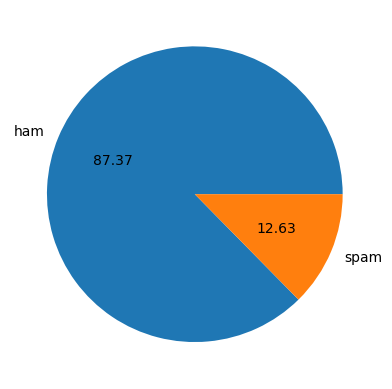

In [19]:
## ham or spam data set we are displaying in the pie chart:
## import matplotlib library

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.02f')
## we will work on the target table which label is ham , spam 
## autopct = '%0.2f' means after decimal have two values:
plt.show()

In [20]:
## Data is imbalanced

In [21]:
import nltk ## natural Language Tool Kit

In [22]:
!pip install nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Abhishek v.
[nltk_data]     sakhare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
## num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

## word_tokenize means sentence which are break by the basis work :

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

## sent_tokenize means basis of sentence break the sms :

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
# ham messages denoted by 0
df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
# spam messages denoted by 1
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
import seaborn as sns

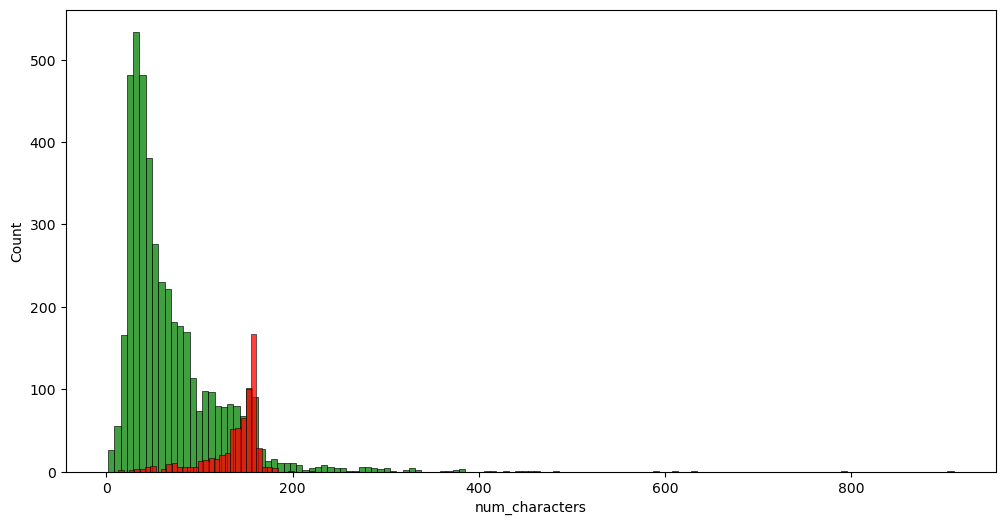

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'],color='green')
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.show()

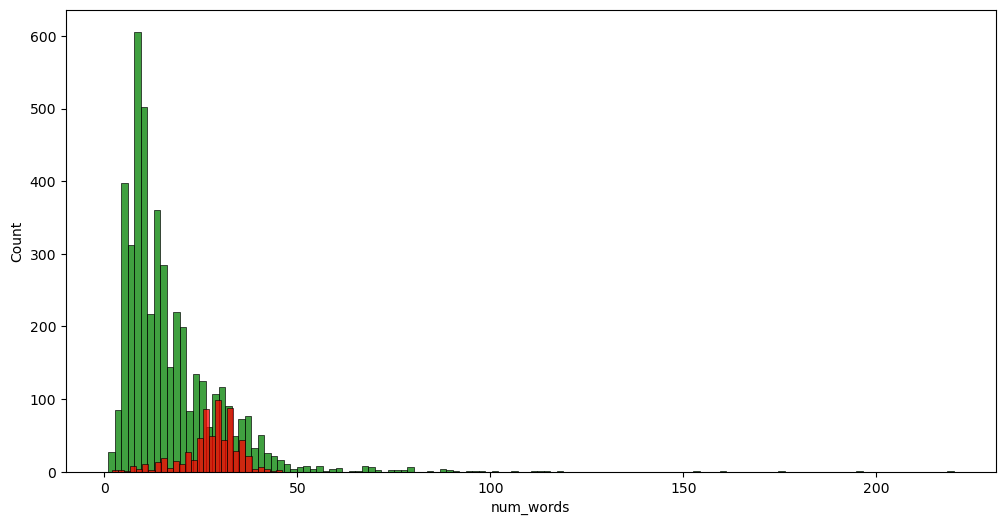

In [35]:
plt.figure(figsize=(12,6))
## ham data
sns.histplot(df[df['target'] == 0]['num_words'],color='green')
## spam data
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

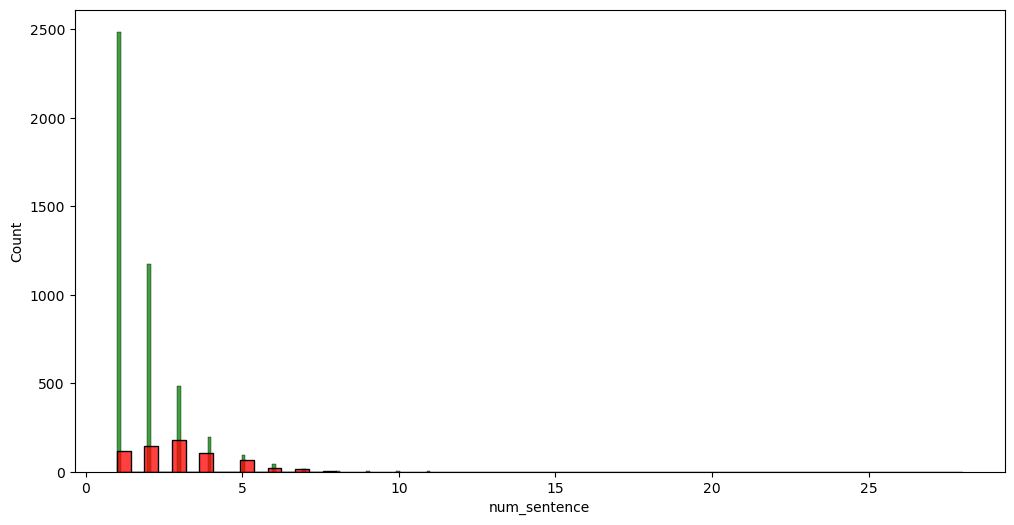

In [36]:
plt.figure(figsize=(12,6))
## ham data
sns.histplot(df[df['target'] == 0]['num_sentence'],color = 'green')

## spam Data

sns.histplot(df[df['target'] == 1]['num_sentence'],color='red')
plt.show()

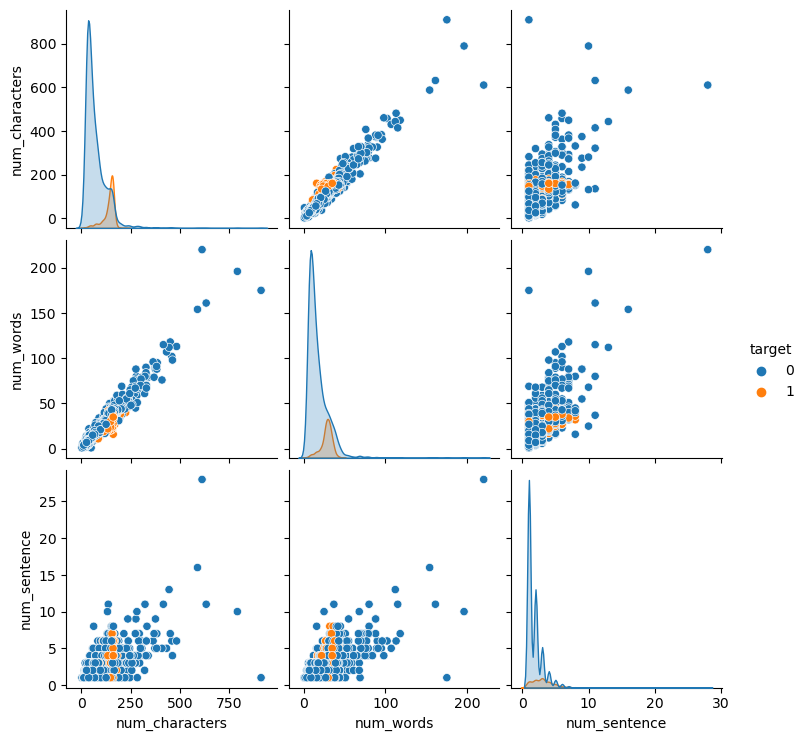

In [37]:
## Plot the pairplot
sns.pairplot(df,hue = 'target')

In [38]:
## corelation coeficient
df.corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentence,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

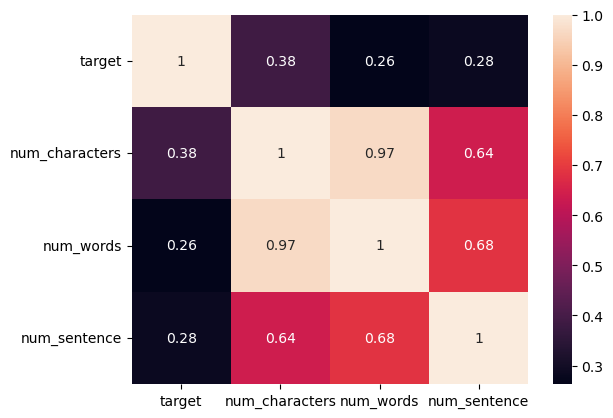

In [39]:
sns.heatmap(df.corr(),annot = True)

#  3. Data Praprocessing

**Lower case**

**Tokenization**

**Removing Special Character**

**Removing stop words and punctuation**

**Stemming**

In [40]:
from nltk.corpus import stopwords

In [41]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string

In [43]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
## it converts the words into root form
##like dancing =danc
##lovely = love 

In [45]:
def transform_text(text):
    text = str(text).lower()  # Convert to string and lowercase text
    text = nltk.word_tokenize(text)  # Split text into a list of words

    y = []
    for i in text:
        if i.isalnum():  # Remove special characters (keep alphanumeric characters)
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    ps = PorterStemmer()
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='black')

In [49]:

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))

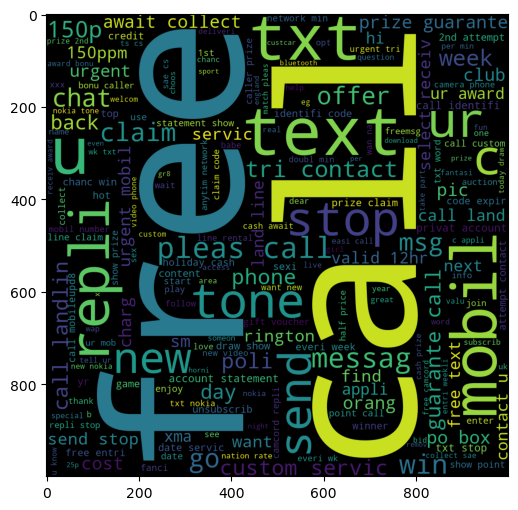

In [50]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [51]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))

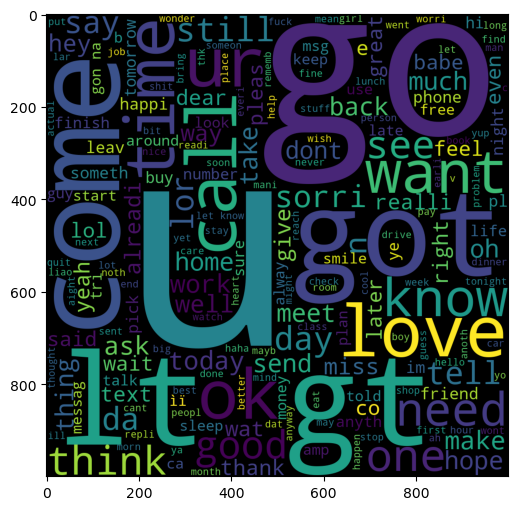

In [52]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [55]:
len(spam_corpus)

9939

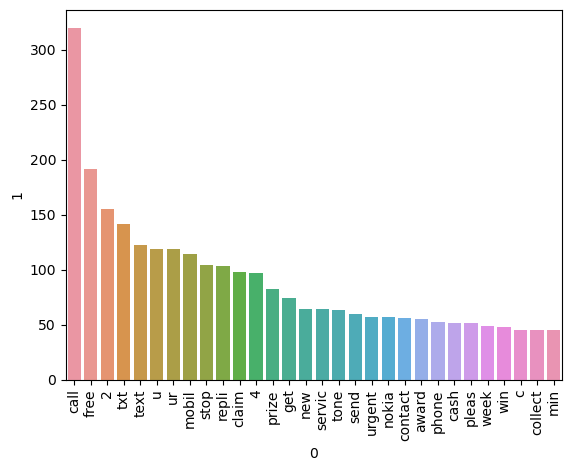

In [56]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
# ham
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35394

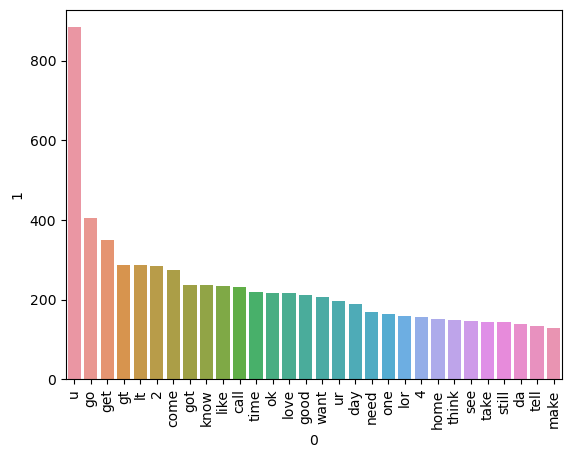

In [59]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building


We will start from Naive Bayes Algorithm as starting point

Text Data needs to be converted into Numerical Data, so we vectorize it. (Starting with bag of words)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


**using CountVectorizer**

In [61]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [62]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [63]:
X.shape

(5169, 6708)

In [64]:
y = df['target'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [71]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [72]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


From this we get to know that BernoulliNB has high accuracy_score and high precision_score



# using TfidfVectorizer

In [73]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [74]:
y = df['target'].values

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [78]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [79]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


From this we get to know that BernoulliNB has high accuracy_score but low precision_score

and MultinomialNB has high precision_score but low accuracy_score

Since data is imbalanced precision_score matters most

So we will go with MultinomialNB with tfidf

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [81]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [82]:
clfs = {
    'SVC' : svc,
    'KN'  : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [83]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [84]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print(f'For {name}')
    print(f'Accuracy = {current_accuracy}')
    print(f'Precision = {current_precision}')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy = 0.9758220502901354
Precision = 0.9747899159663865
For KN
Accuracy = 0.9052224371373307
Precision = 1.0
For NB
Accuracy = 0.9709864603481625
Precision = 1.0
For DT
Accuracy = 0.9323017408123792
Precision = 0.8333333333333334
For LR
Accuracy = 0.9584139264990329
Precision = 0.9702970297029703
For RF
Accuracy = 0.9748549323017408
Precision = 0.9827586206896551
For AdaBoost
Accuracy = 0.960348162475822
Precision = 0.9292035398230089
For BgC
Accuracy = 0.9574468085106383
Precision = 0.8671875
For ETC
Accuracy = 0.9748549323017408
Precision = 0.9745762711864406
For GBDT
Accuracy = 0.9477756286266924
Precision = 0.92
For xgb
Accuracy = 0.971953578336557
Precision = 0.943089430894309


In [85]:
performance_df = pd.DataFrame({
                                'Algorithm': clfs.keys(),
                                'Accuracy' : accuracy_scores,
                                'Precision' : precision_scores
}).sort_values(by=['Precision', 'Accuracy'], ascending=False)

In [86]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.970986,1.000000
1,KN,0.905222,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [87]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

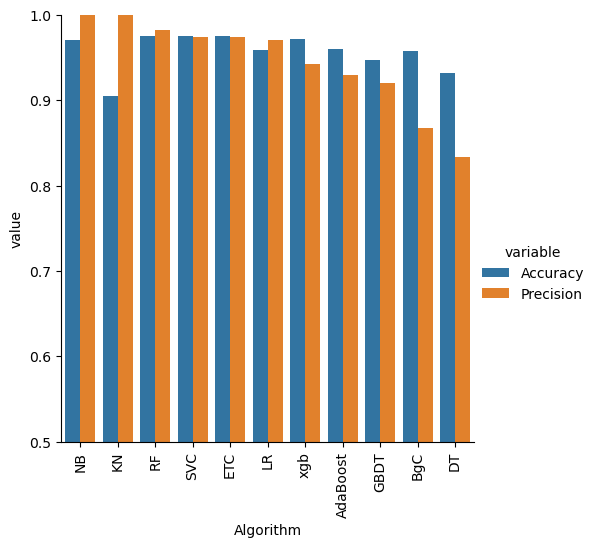

In [88]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

# Model Improvement

Change the max_features parameter of Tfidf

At starting in TfidfVectorizer I didn't provided max_features (which was taking all the words to vectorize), but to improve model I took max_features = 3000, restricted max no. of words


In [89]:
temp_df = pd.DataFrame({
    'Algorithm' : clfs.keys(),
    'Accuracy_max_ft_3000' : accuracy_scores,
    'Precision_max_ft_3000' : precision_scores
})

In [90]:
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.970986,1.000000,0.970986,1.000000
1,KN,0.905222,1.000000,0.905222,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,xgb,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188


Naive Bayes Algorithm has high Precision Value after taking max_features=3000, so I will go with Naive Bayes NB

# Final Training

also recheck and rerun model building basics as X, y, train_test_split

In [91]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
